In [ ]:
import os
from music21 import converter
import matplotlib.pyplot as plt

In [83]:
path = "asap-dataset-master/Bach/Prelude/"

all_note_onsets = {}
file_counts = {}

# Looping through ".musicxml"-files in subfolders
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".musicxml"):
            # Load file
            score = converter.parse(os.path.join(root, file))
            
            # Get time signature and add 1 to file count
            time_signature = score.flatten().getElementsByClass('TimeSignature')[0].ratioString
            file_counts[time_signature] = file_counts.get(time_signature, 0) + 1

            # Initialize dictionary entry for time signature
            if time_signature not in all_note_onsets:
                all_note_onsets[time_signature] = {}
            
            note_onsets = all_note_onsets[time_signature]

            # Extract note onset frequencies for the current file and add to time signature
            for part in score.parts:
                for measure in part.getElementsByClass('Measure'):
                    for element in measure.flatten():
                        if 'Note' in element.classes:
                            onset = element.offset
                            if onset in note_onsets:
                                note_onsets[onset] += 1
                            else:
                                note_onsets[onset] = 1

# Sort time signatures based on file counts
sorted_time_signatures = sorted(file_counts, key=file_counts.get, reverse=True)



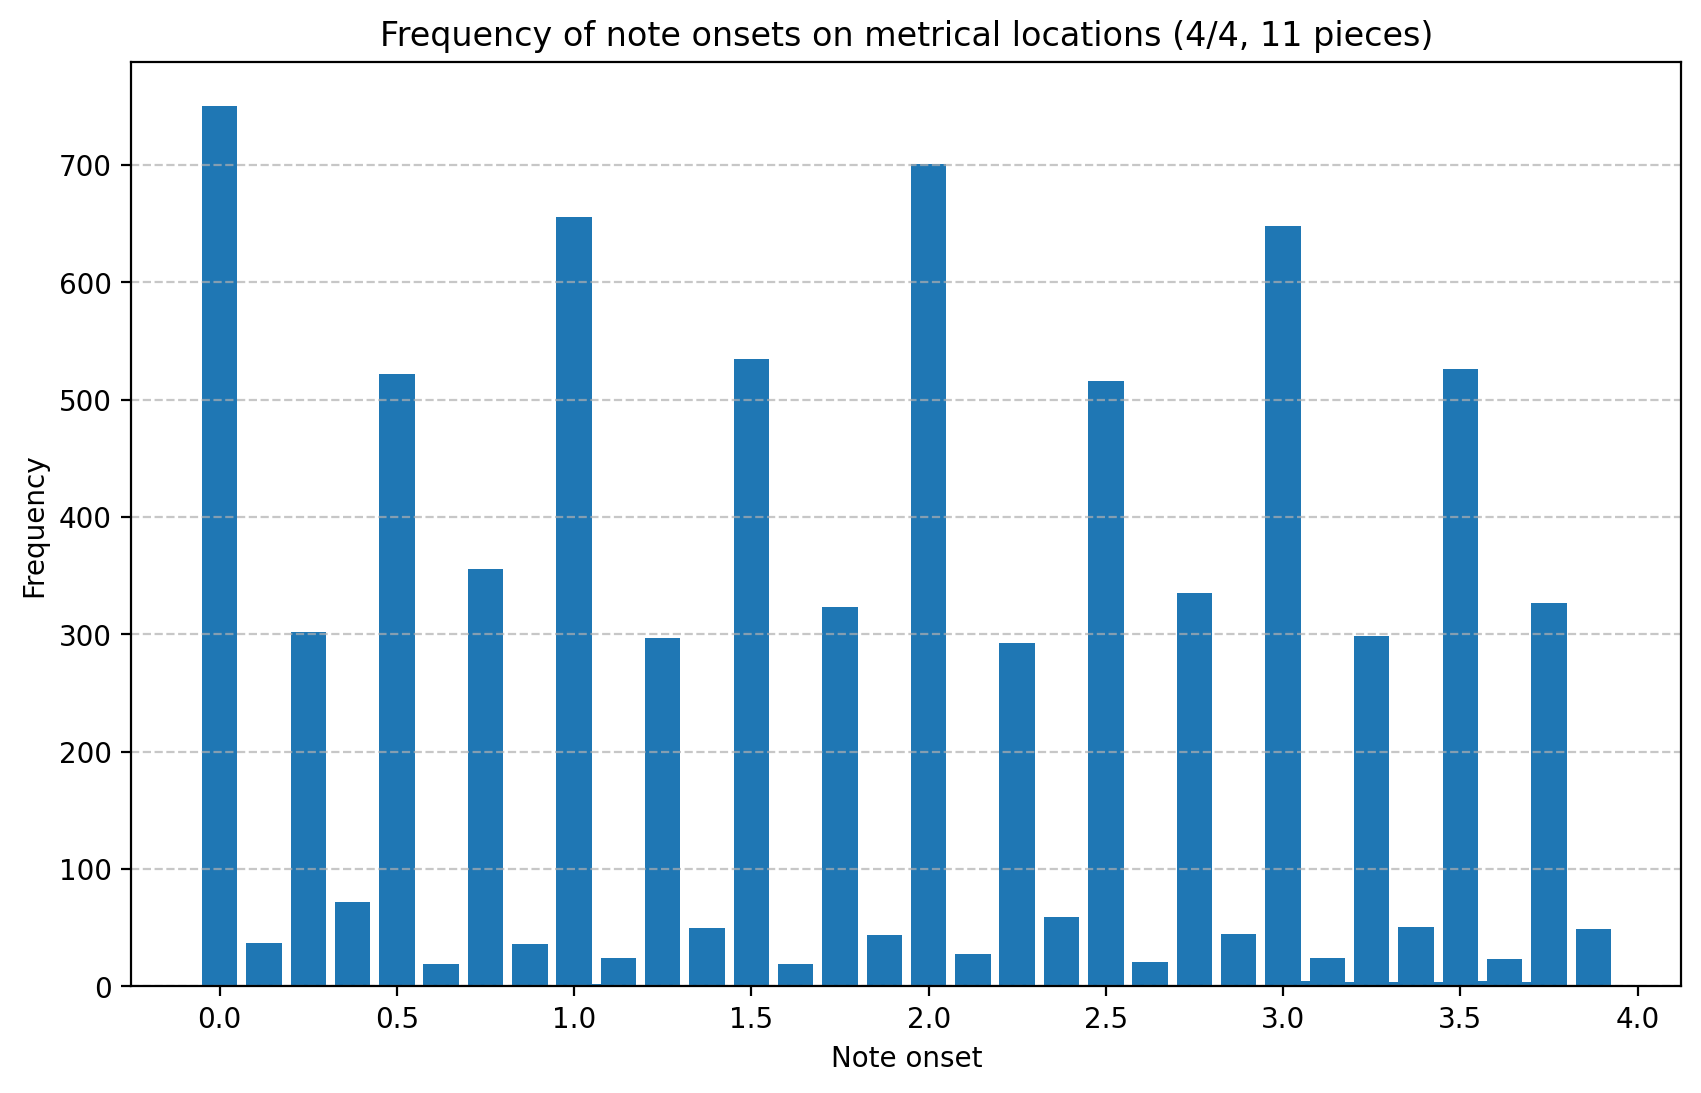

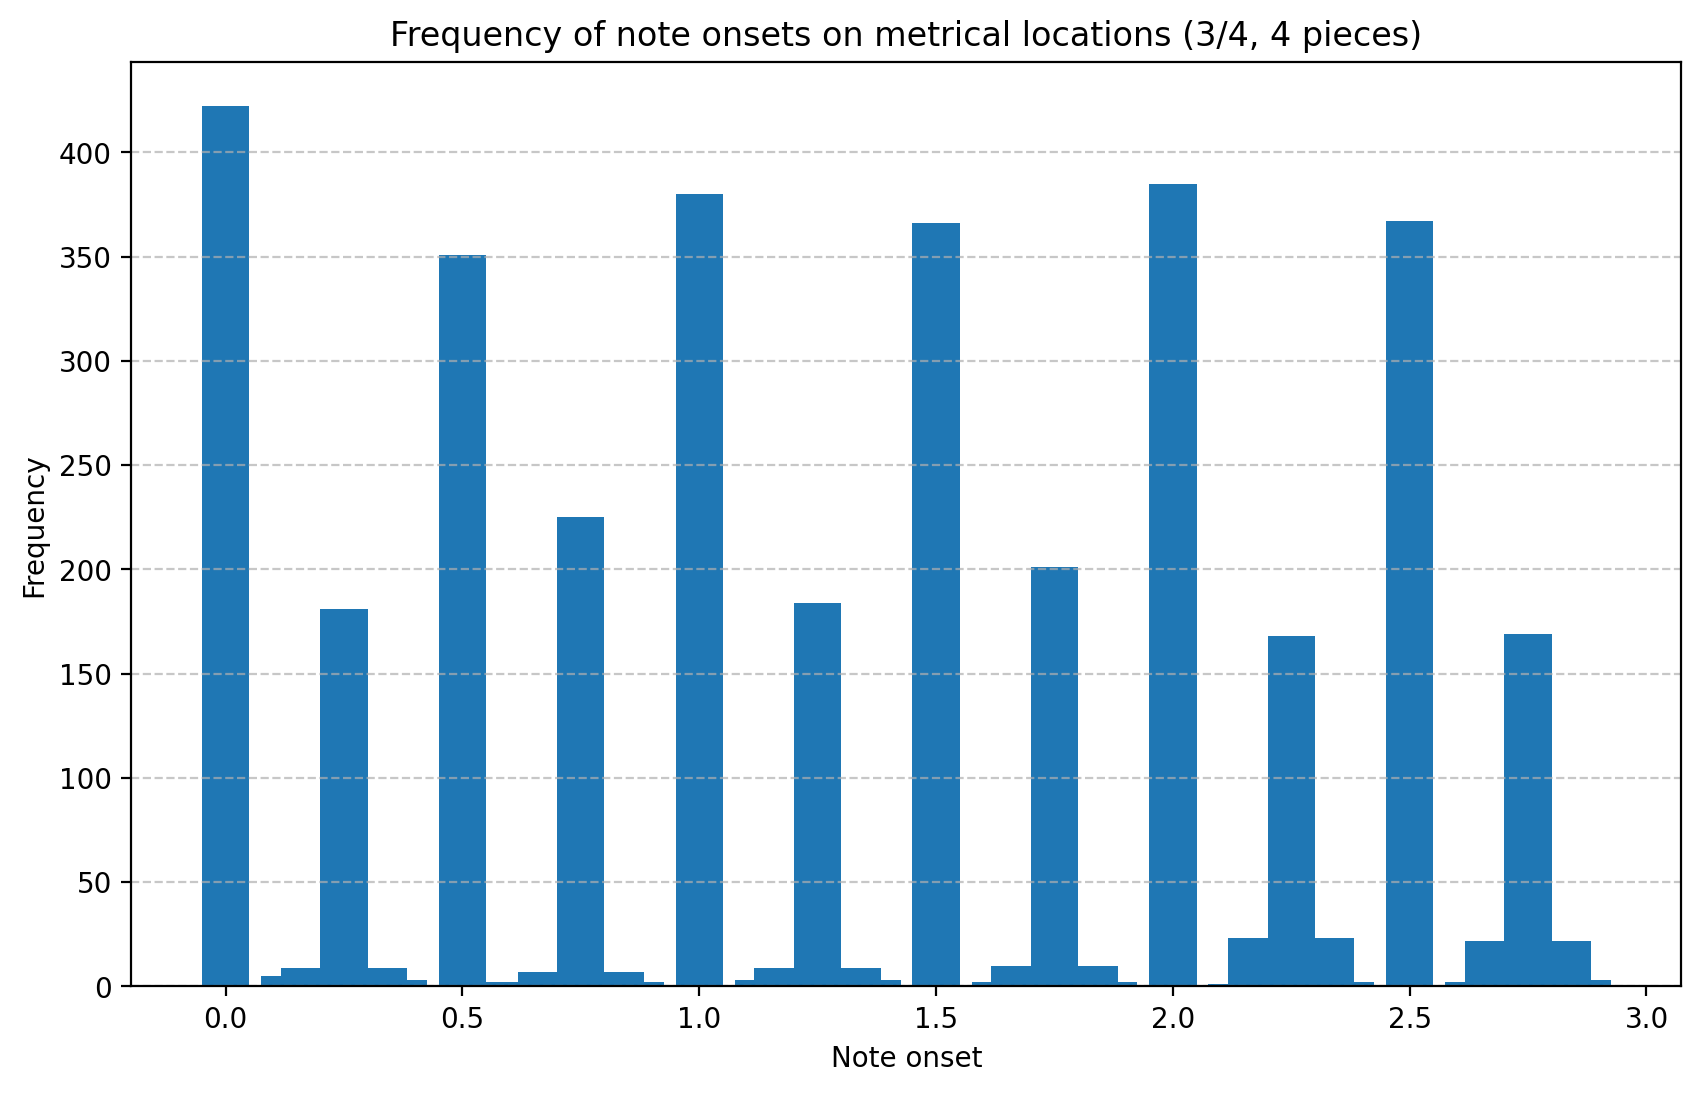

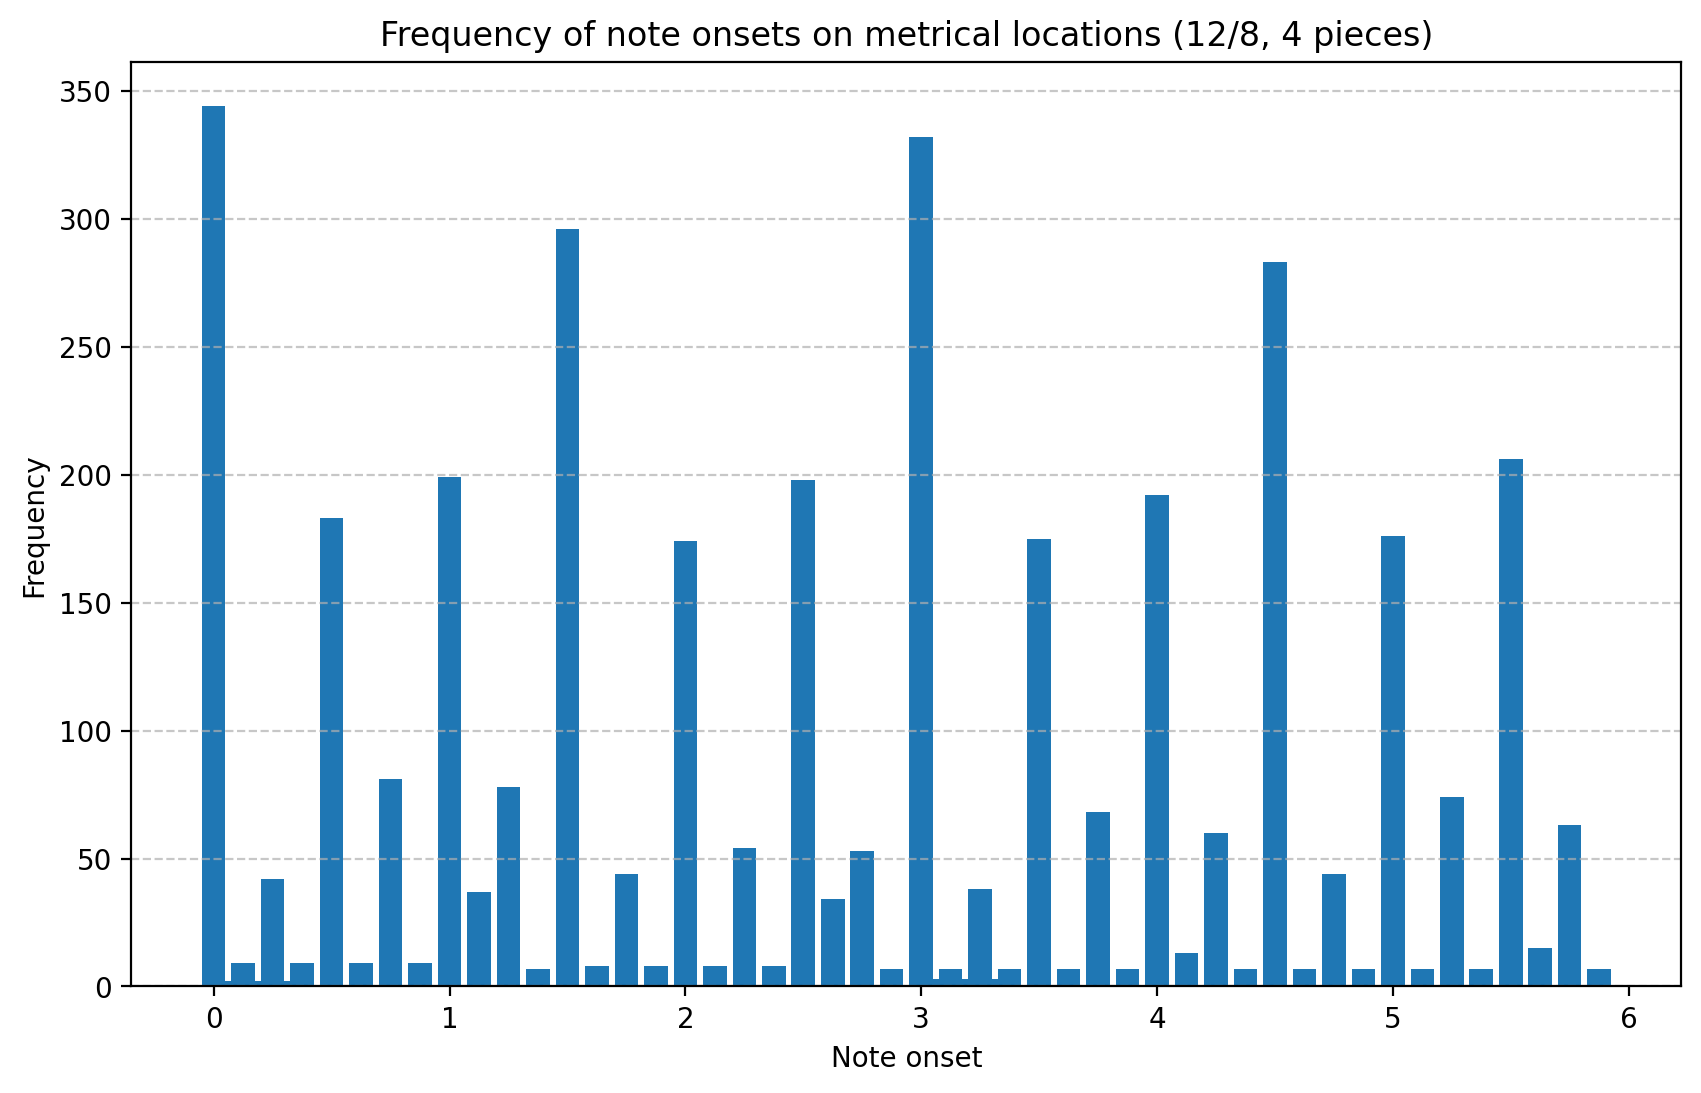

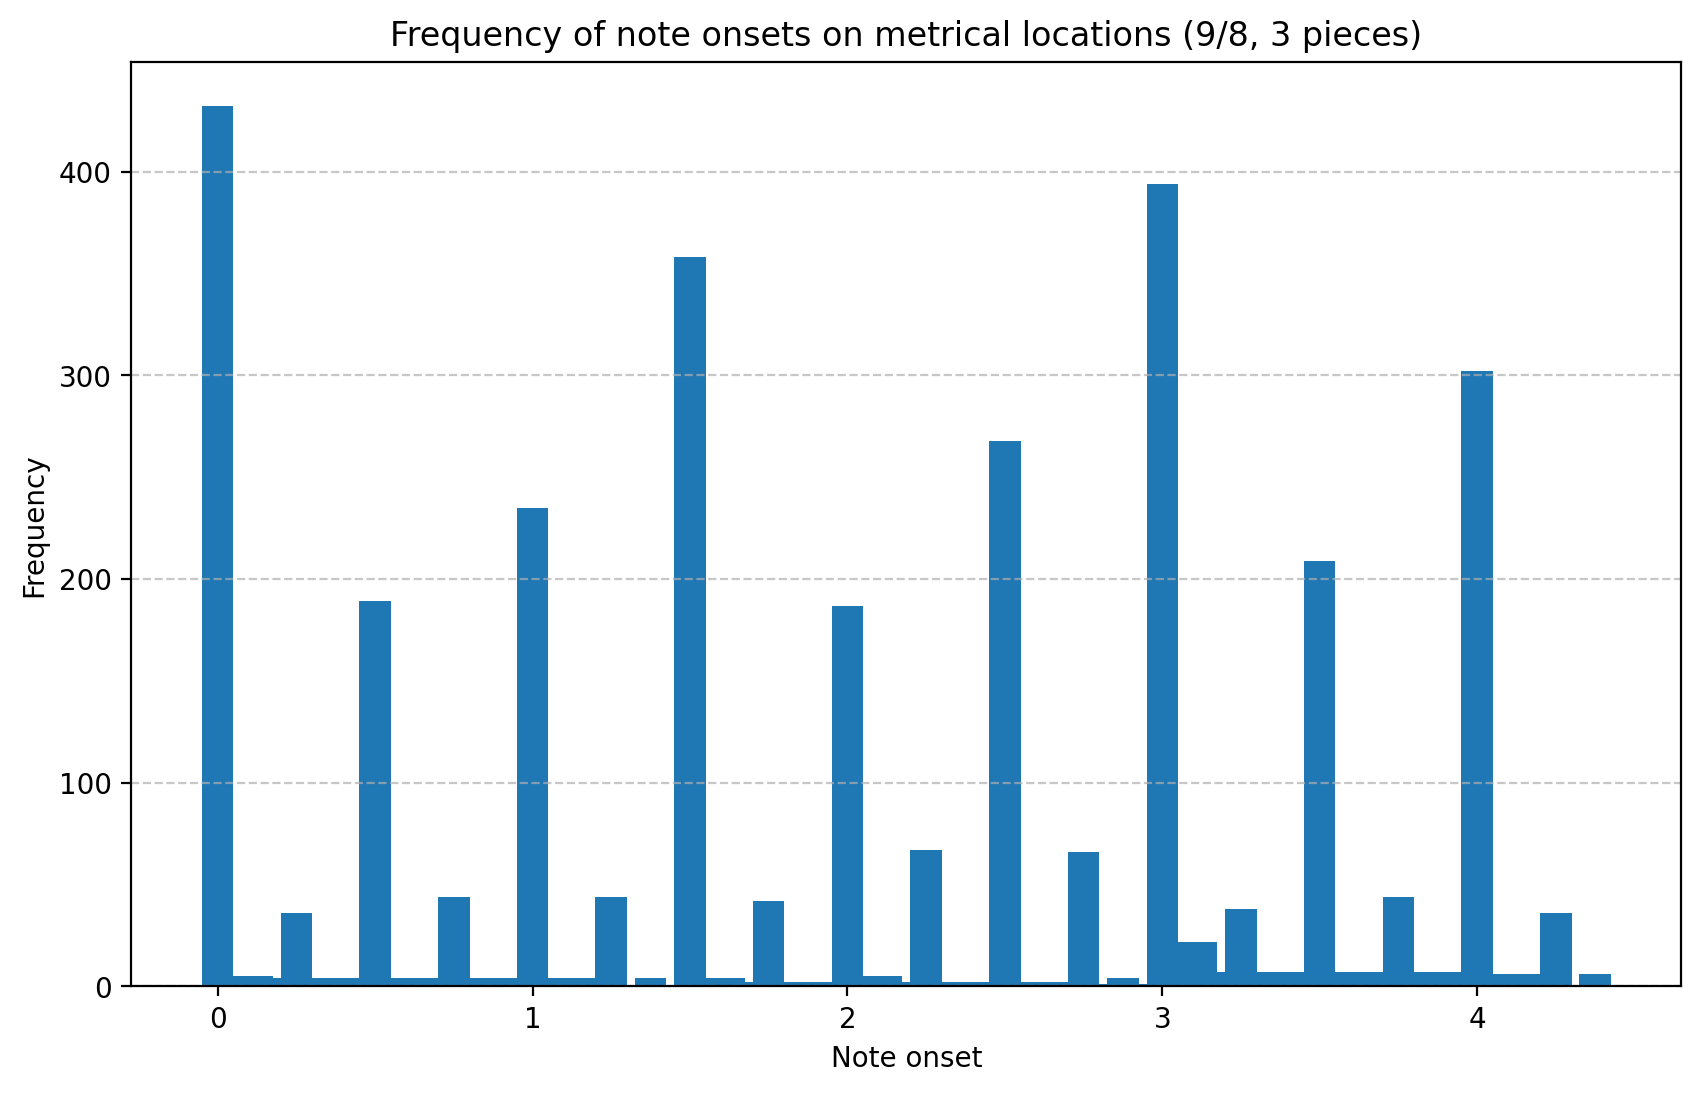

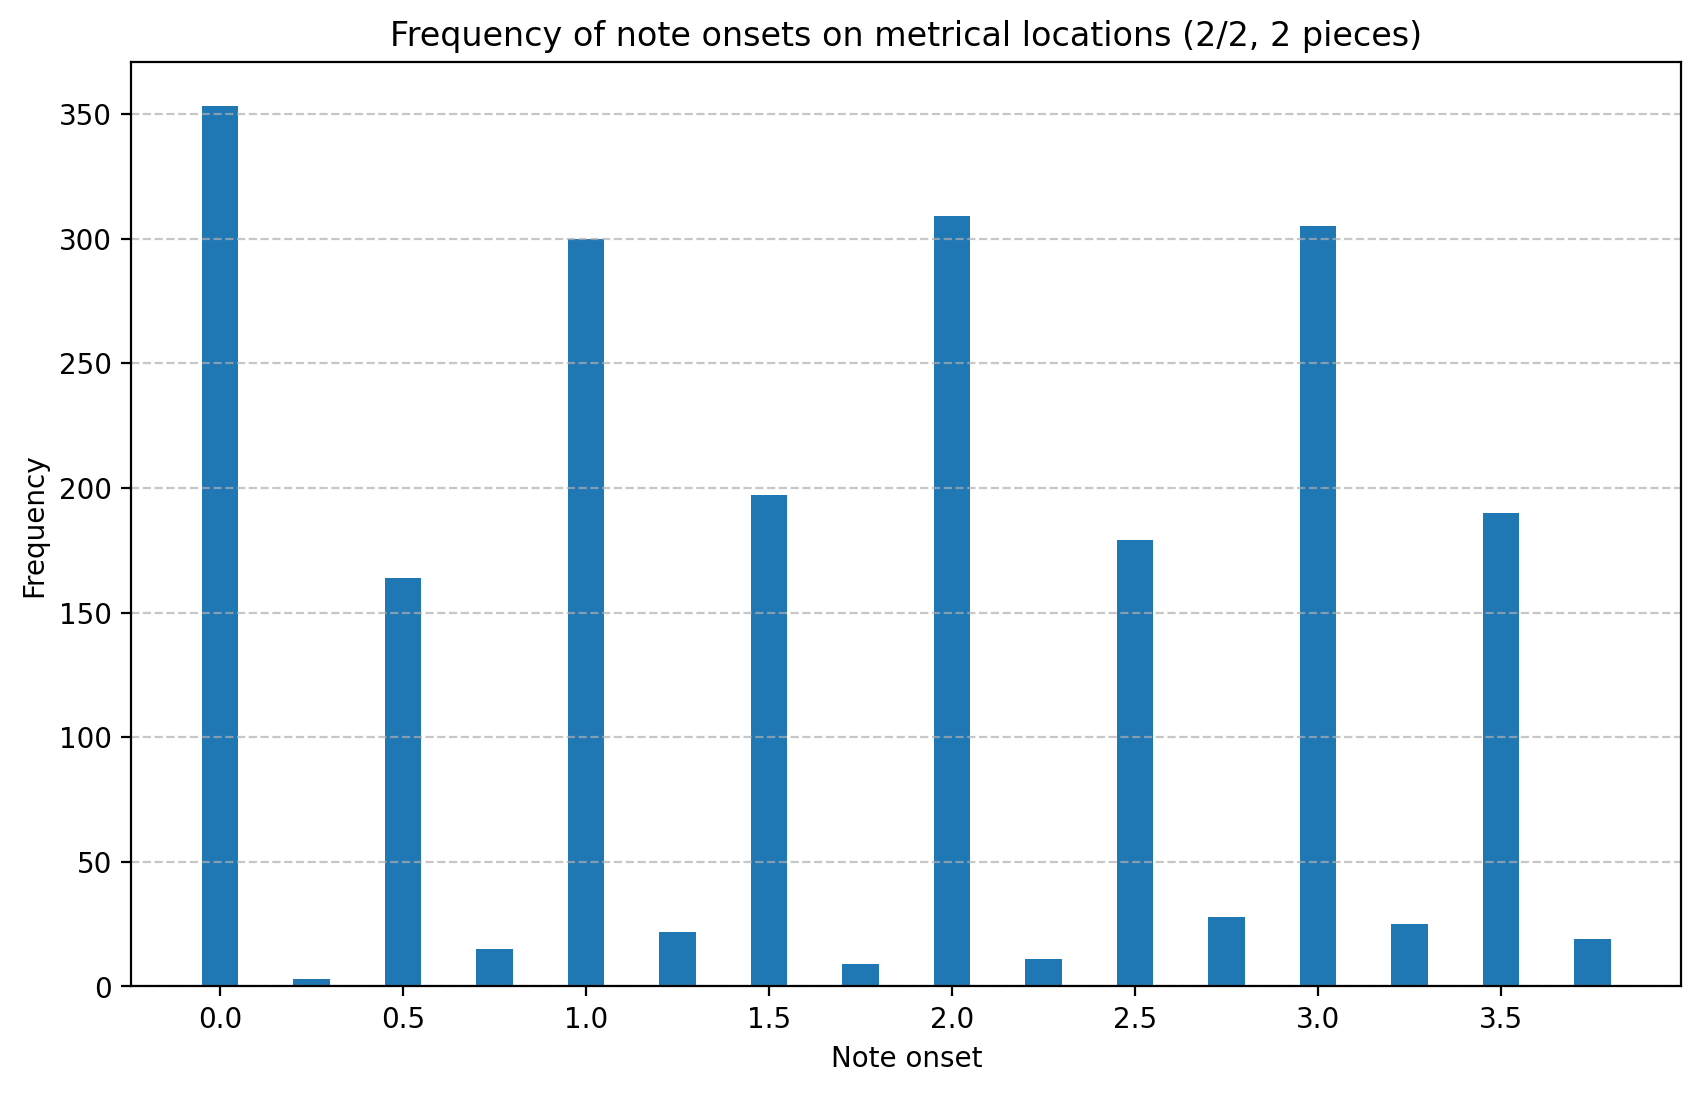

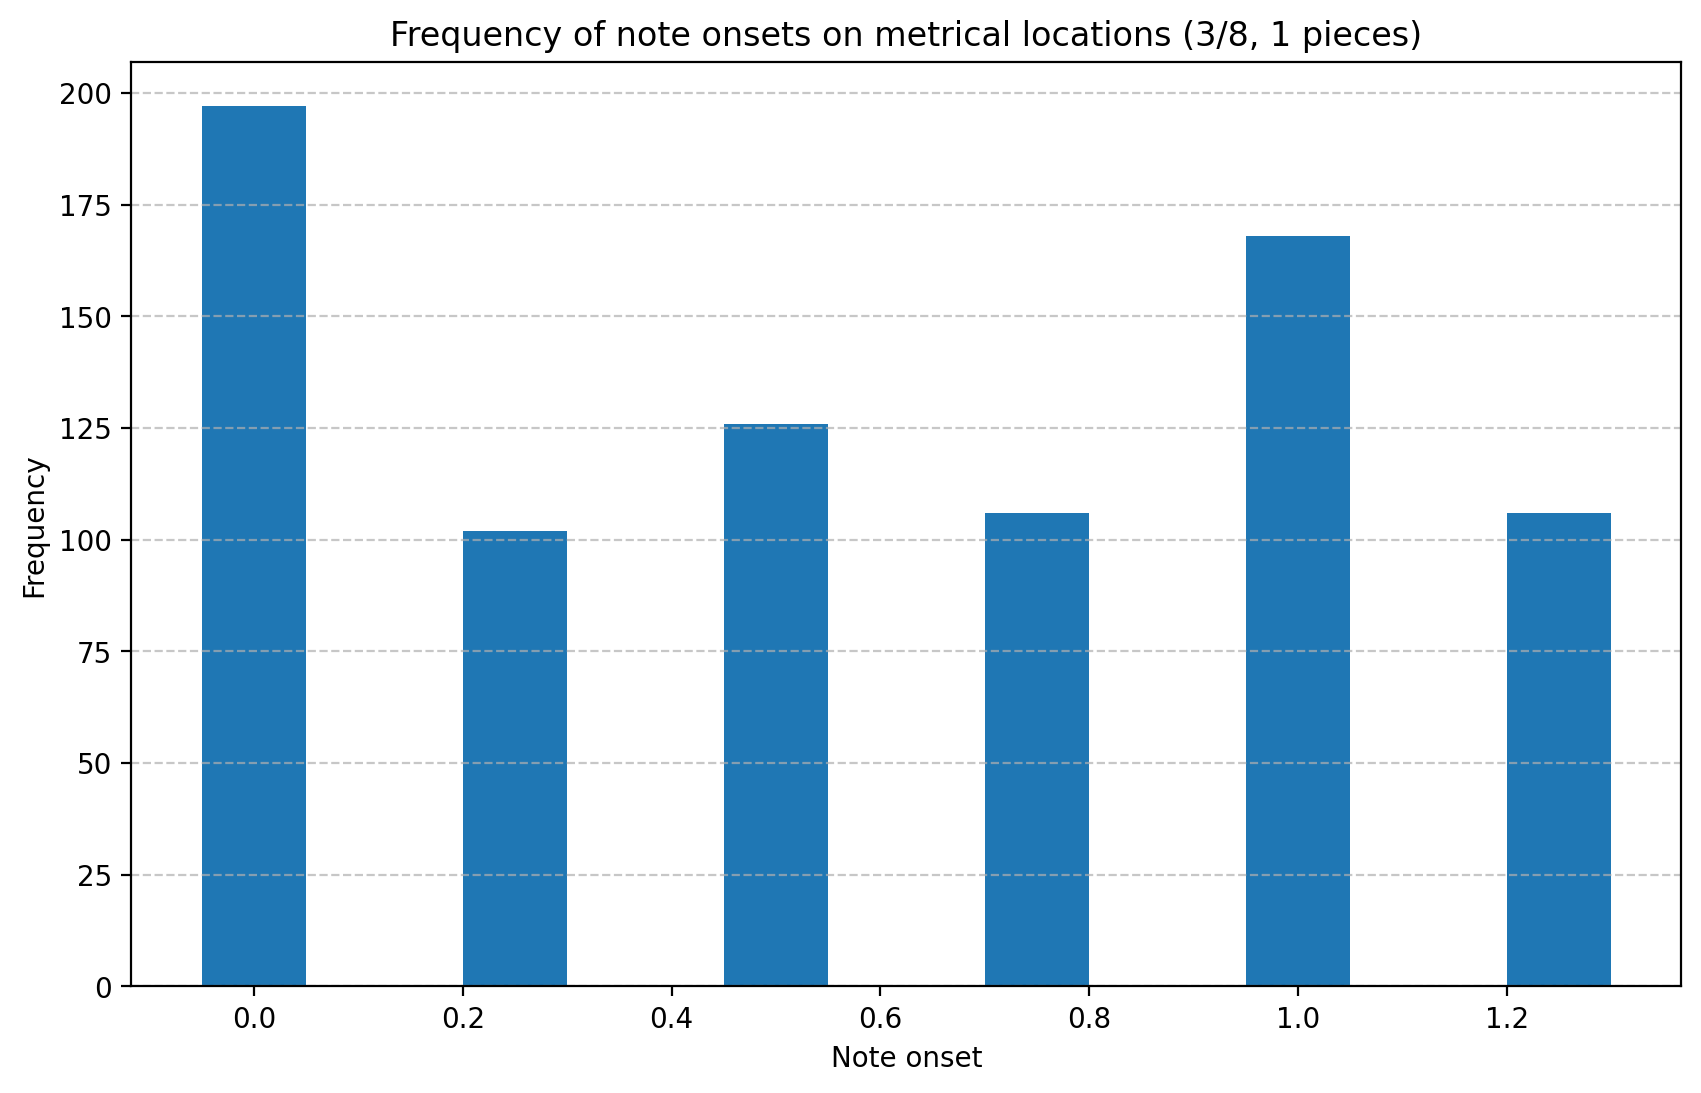

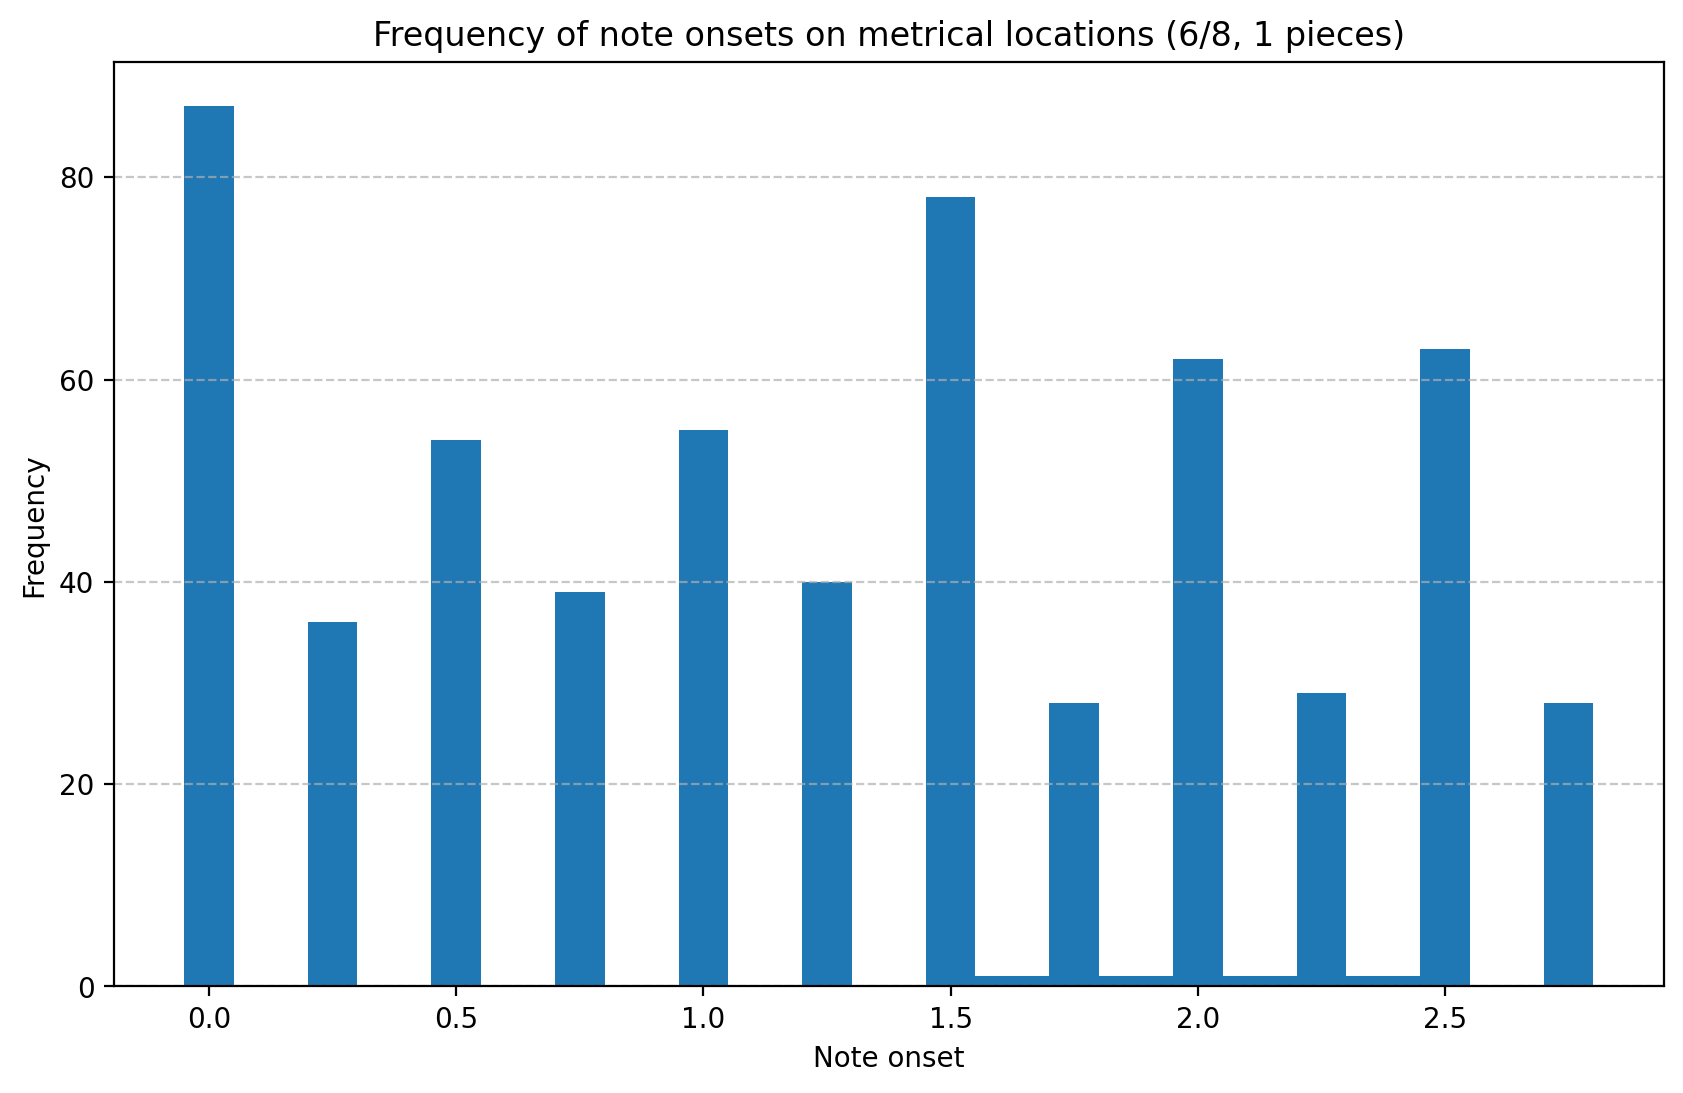

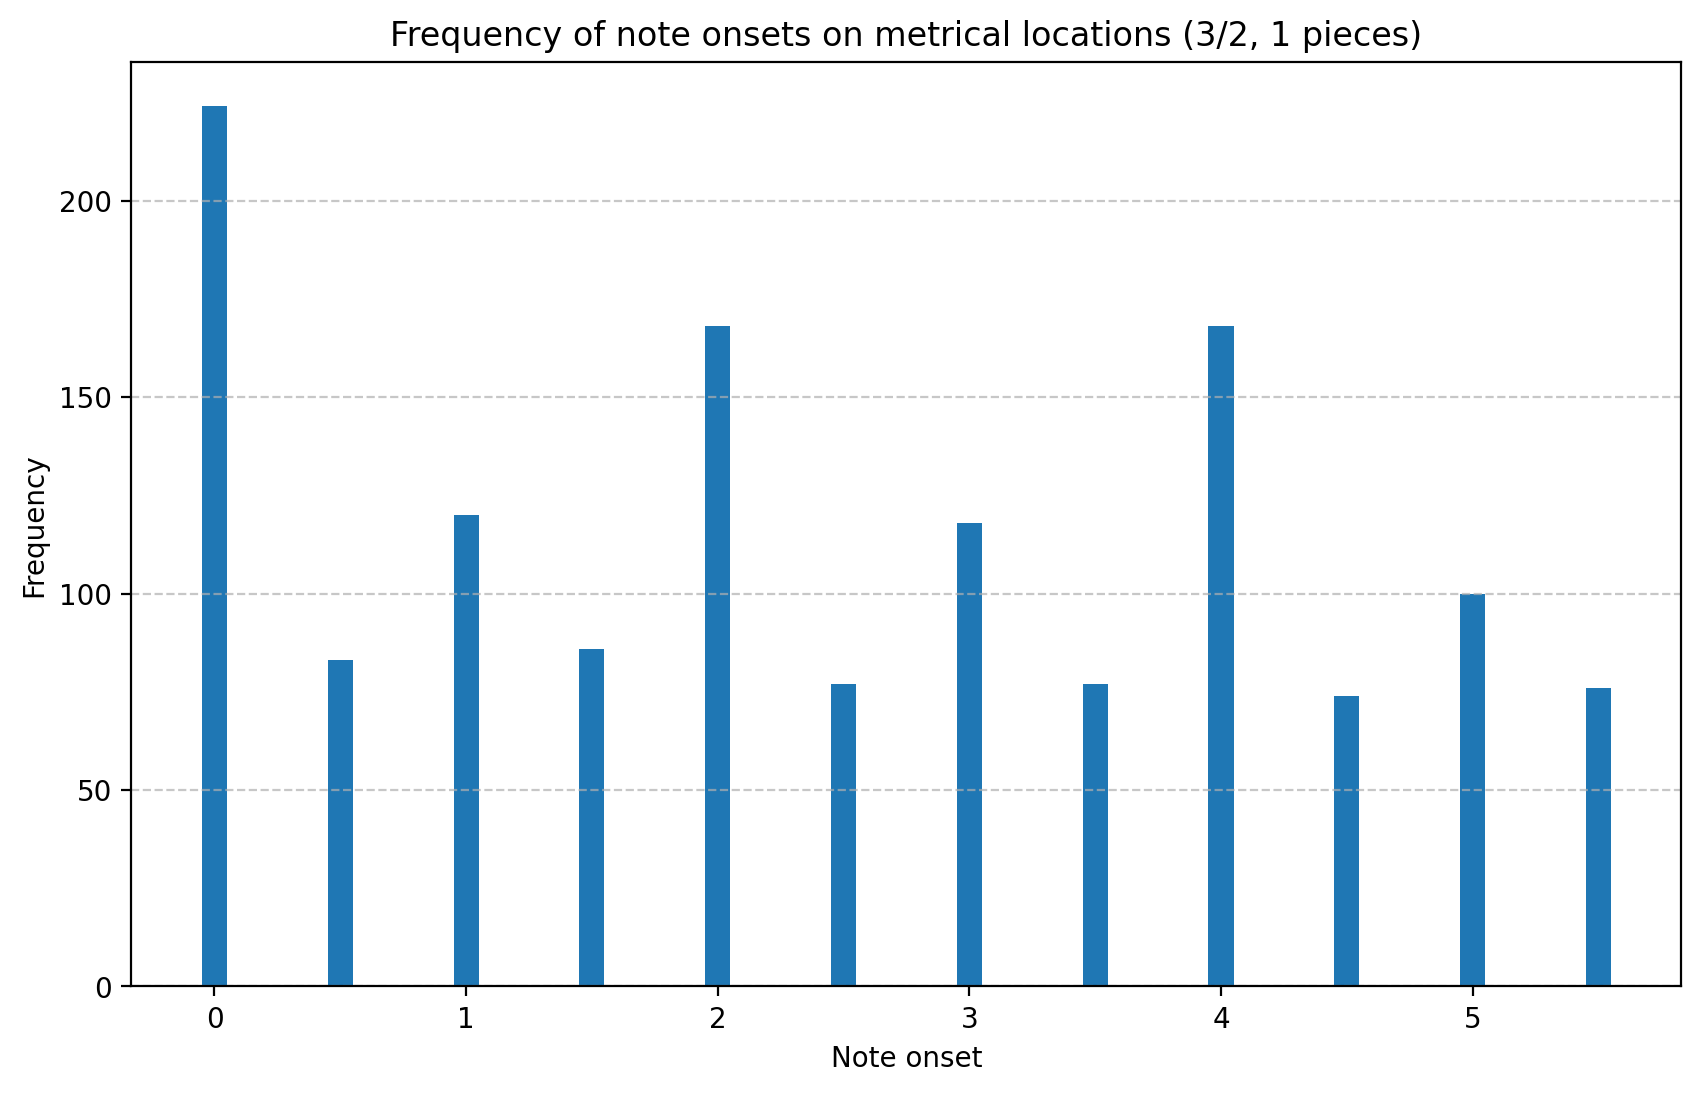

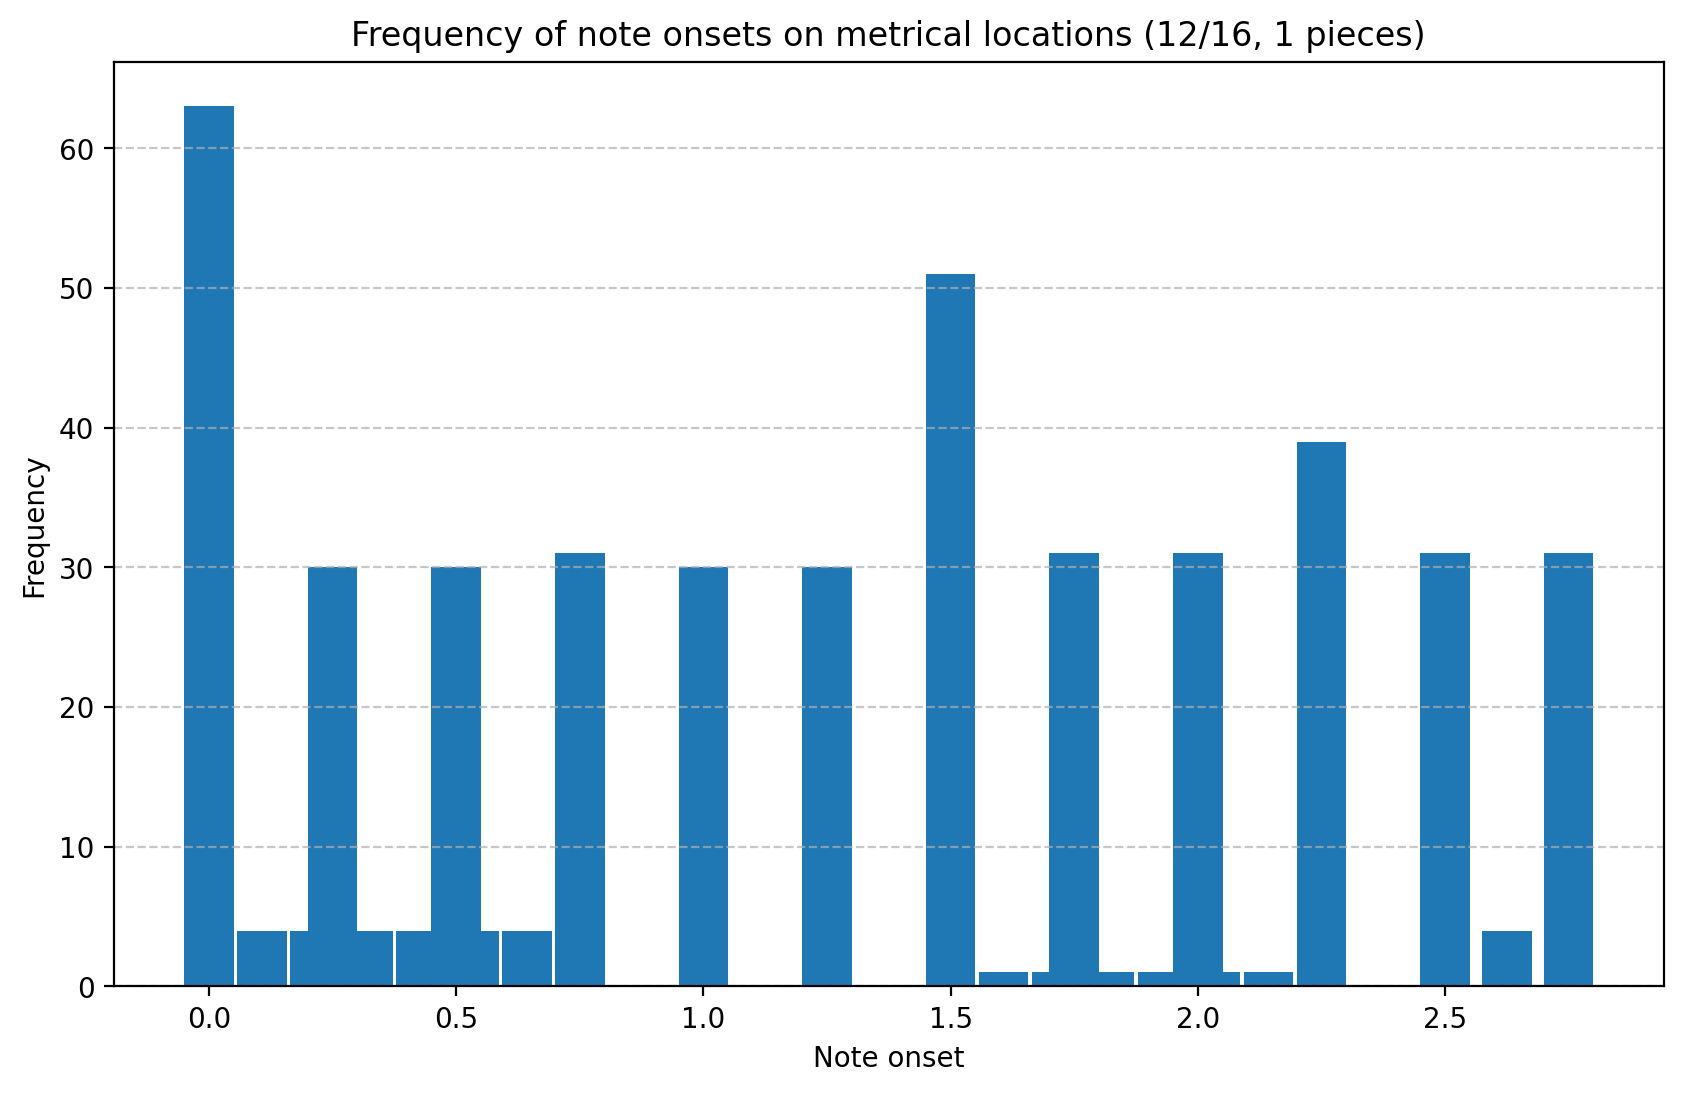

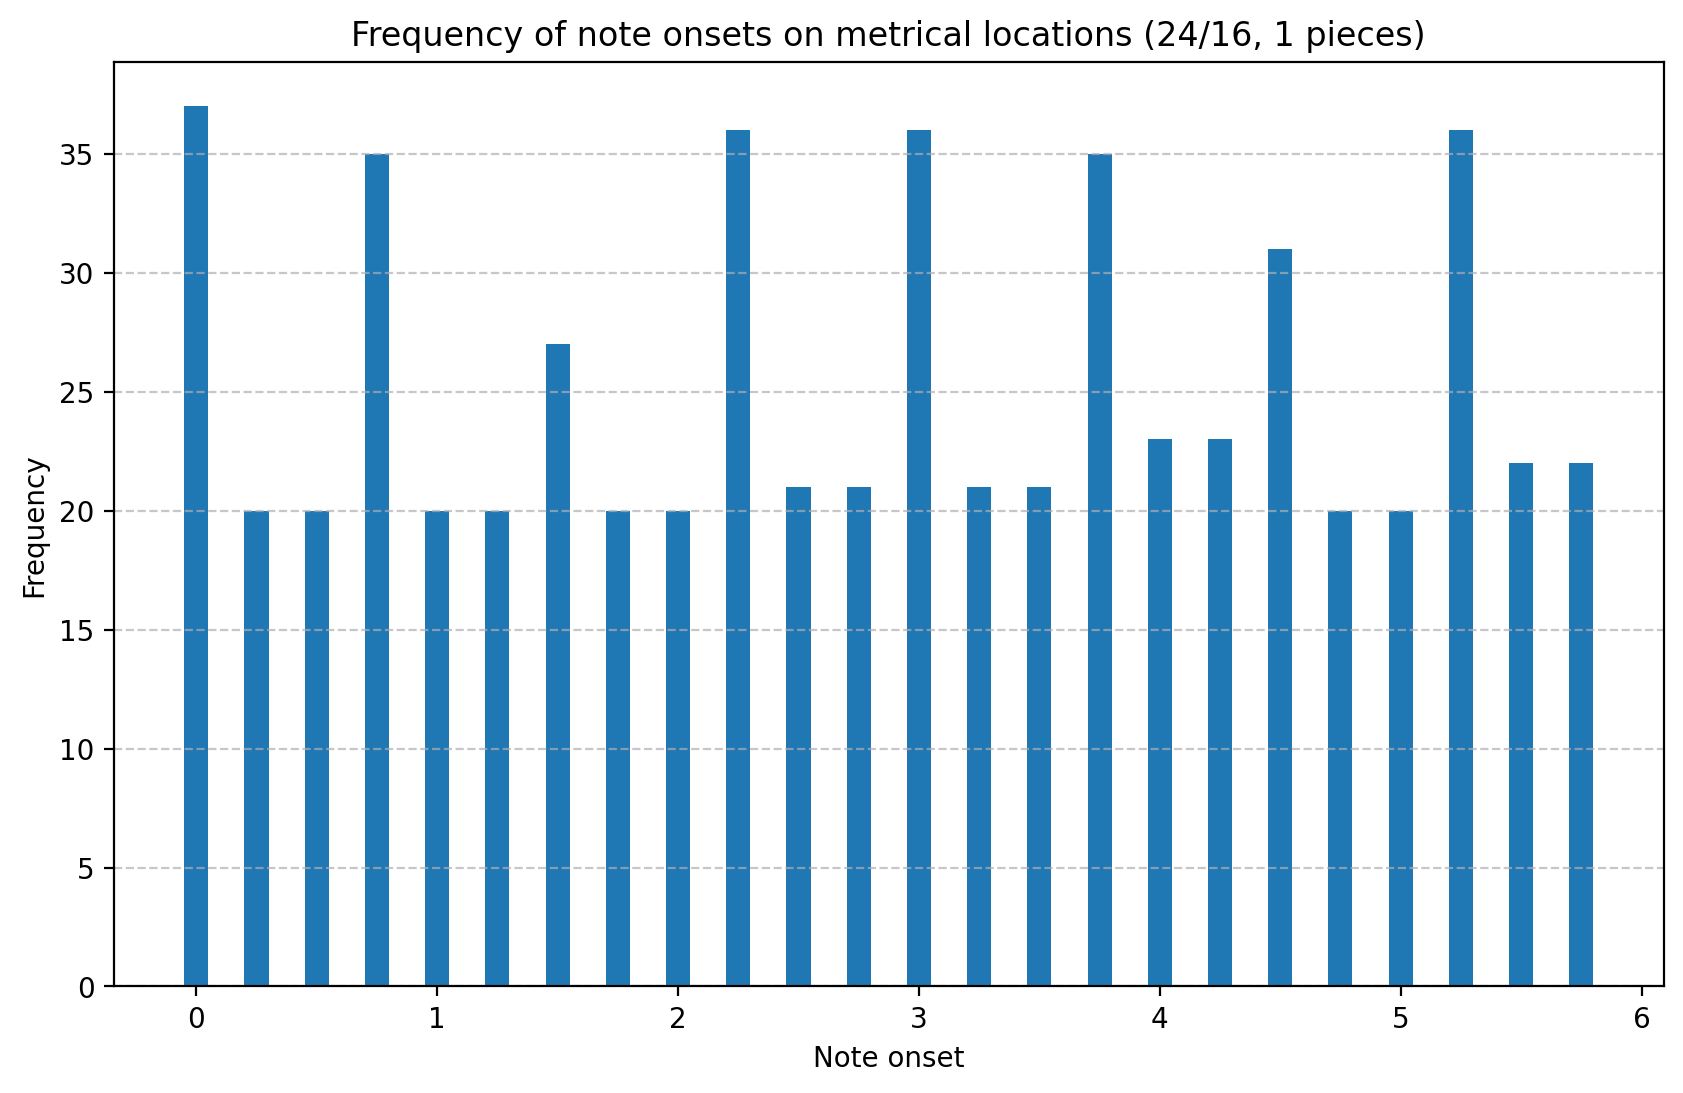

In [84]:
# Plotting note onset frequencies for each time signature
for time_signature in sorted_time_signatures:
    note_onsets = all_note_onsets[time_signature]
    plt.figure(figsize=(10, 6))
    plt.bar(note_onsets.keys(), note_onsets.values(), width=0.1)
    plt.xlabel('Note onset')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of note onsets on metrical locations ({time_signature}, {file_counts[time_signature]} pieces)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()